PROJECT 1





https://platform.stratascratch.com/data-projects/insights-city-supply-and-demand-data

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "https://raw.githubusercontent.com/myronlewis06/Data-Science-Project/refs/heads/main/dataset_1.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [5]:
df.shape

(336, 7)

In [6]:
df.isnull().sum()

,0
Date,321
Time (Local),0
Eyeballs,0
Zeroes,0
Completed Trips,0
Requests,0
Unique Drivers,0


In [7]:
df['Date'].ffill(axis =0, inplace =True)
df.head(20)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
5,10-Sep-12,12,12,0,2,2,11
6,10-Sep-12,13,9,1,0,0,9
7,10-Sep-12,14,12,1,0,0,9
8,10-Sep-12,15,11,2,1,2,7
9,10-Sep-12,16,11,2,3,4,6


In [8]:
df.isnull().sum()

,0
Date,0
Time (Local),0
Eyeballs,0
Zeroes,0
Completed Trips,0
Requests,0
Unique Drivers,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


# 1 - Which date had the most completed trips during the two week period?

In [11]:
df.head()


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


In [12]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

In [13]:
df.groupby('Date').agg(Total_completed = ('Completed Trips ','sum')).reset_index().sort_values(by='Total_completed',ascending= False).head(1)

,Date,Total_completed
12,22-Sep-12,248


# 2- What was the highest number of completed trips within a 24 hour period?

In [14]:
df.head()


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


In [15]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time (Local)'].astype(str) + ':00:00')
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,datetime
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00


In [16]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers', 'datetime'],
      dtype='object')

In [17]:
df.set_index('datetime', inplace=True)
df.head()


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
datetime,,,,,,,
2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9
2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14
2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14
2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14
2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11


In [18]:
df['rolling_sum'] =df['Completed Trips '].rolling('24H').sum().shift(-23)
df['rolling_sum'].head()

,rolling_sum
datetime,
2012-09-10 07:00:00,29.0
2012-09-10 08:00:00,29.0
2012-09-10 09:00:00,27.0
2012-09-10 10:00:00,27.0
2012-09-10 11:00:00,28.0


In [19]:
df['rolling_sum'].sort_values(ascending=False).head(1)

,rolling_sum
datetime,
2012-09-21 17:00:00,278.0


# 3- Which hour of the day had the most requests during the two week period?

In [20]:
df.groupby('Time (Local)').agg(Total_requests = ('Requests ','sum')).reset_index().sort_values(by='Total_requests',ascending= False).head(1)

,Time (Local),Total_requests
23,23,184


# 4- What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?

In [21]:
df = df.reset_index()
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,rolling_sum
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,29.0
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,29.0
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,27.0
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,27.0
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,28.0


In [22]:
df['day_of_week'] = df['datetime'].dt.day_name()
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,rolling_sum,day_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,29.0,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,29.0,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,27.0,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,27.0,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,28.0,Monday


In [23]:
num =df[(df['day_of_week'] == 'Friday') & (df['Time (Local)'] >=17) | (df['day_of_week'] == 'Saturday') | (df['day_of_week'] == 'Sunday') & (df['Time (Local)'] <=3)]['Zeroes '].sum()
num


644

In [24]:
den = df['Zeroes '].sum()
den

1429

In [25]:
percent_of_all_zeros = (num/den)*100
percent_of_all_zeros.round(2)

45.07

# 5- What is the weighted average ratio of completed trips per driver during the two week period?

In [26]:
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,rolling_sum,day_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,29.0,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,29.0,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,27.0,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,27.0,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,28.0,Monday


In [27]:
df.columns

Index(['datetime', 'Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ',
       'Completed Trips ', 'Requests ', 'Unique Drivers', 'rolling_sum',
       'day_of_week'],
      dtype='object')

In [28]:
df_drivers = df[df['Unique Drivers']>0]
df_drivers['ratio'] =df_drivers['Completed Trips ']/df_drivers['Unique Drivers']
df_drivers.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,rolling_sum,day_of_week,ratio
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,29.0,Monday,0.222222
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,29.0,Monday,0.142857
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,27.0,Monday,0.000000
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,27.0,Monday,0.000000
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,28.0,Monday,0.363636


In [29]:
np.average(df_drivers['ratio'])

0.4743397876937869

In [30]:
weighted_avg = sum(df_drivers['ratio'] *df_drivers['Completed Trips '])/sum(df_drivers['Completed Trips '])
weighted_avg

0.8282775715092395

# 6- In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [31]:

df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,rolling_sum,day_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,29.0,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,29.0,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,27.0,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,27.0,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,28.0,Monday


In [32]:
df.set_index('datetime', inplace=True)
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,rolling_sum,day_of_week
datetime,,,,,,,,,
2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,29.0,Monday
2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,29.0,Monday
2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,27.0,Monday
2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,27.0,Monday
2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,28.0,Monday


In [33]:
# df.set_index('datetime', inplace=True)
df_rolling_sum = df['Requests '].rolling('8H').sum().shift(-7).sort_values(ascending=False)
df_rolling_sum.head(2)

,Requests
datetime,
2012-09-21 17:00:00,207.0
2012-09-22 19:00:00,207.0


#7- True or False: Driver supply always increases when demand increases during the two week period.

Answer : No

Explaination : Generally it increases but not always

In [34]:
df.reset_index(inplace=True)
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,rolling_sum,day_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,29.0,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,29.0,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,27.0,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,27.0,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,28.0,Monday


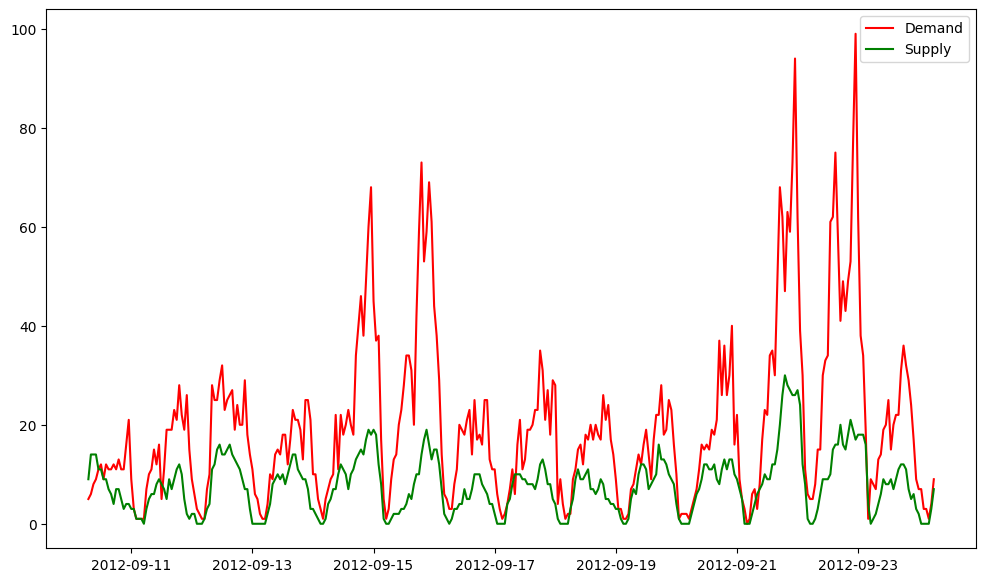

In [35]:
plt.figure(figsize=(12,7))
plt.plot(df['datetime'], df['Eyeballs '], color ='red', label ='Demand')
plt.plot(df['datetime'], df['Unique Drivers'], color ='green', label ="Supply")
plt.legend()
plt.show()



# 8- In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [36]:
df.set_index('datetime', inplace=True)

In [37]:
df.rolling_sum = df['Zeroes '].rolling('72H').sum().shift(-71)/df['Eyeballs '].rolling('72H').sum().shift(-71)
df.rolling_sum.sort_values(ascending=False).head(1)

,rolling_sum
datetime,
2012-09-15 05:00:00,0.292977


# 9- If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

In [38]:
df.reset_index(inplace=True)
df.head()


,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,rolling_sum,day_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,0.179916,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,0.180021,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,0.180498,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,0.180412,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,0.180328,Monday


In [39]:
df.columns

Index(['datetime', 'Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ',
       'Completed Trips ', 'Requests ', 'Unique Drivers', 'rolling_sum',
       'day_of_week'],
      dtype='object')

In [40]:
eye_vs_driver = df.groupby('Time (Local)').agg(Total_eyeballs = ('Eyeballs ','sum'), Total_drivers = ('Unique Drivers','sum')).reset_index()
eye_vs_driver['ratio'] = eye_vs_driver['Total_eyeballs']/eye_vs_driver['Total_drivers']
eye_vs_driver.head()
eye_vs_driver.sort_values(by='ratio',ascending=False).head(1)

,Time (Local),Total_eyeballs,Total_drivers,ratio
23,23,488,119,4.10084


# 10- True or False: There is exactly two weeks of data in this analysis

Answer: True

In [41]:
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,rolling_sum,day_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,0.179916,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,0.180021,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,0.180498,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,0.180412,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,0.180328,Monday


In [42]:
df['datetime'].min()

Timestamp('2012-09-10 07:00:00')

In [43]:
df['datetime'].max()

Timestamp('2012-09-24 06:00:00')

# 11-Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)

In [44]:
df.head()
df.reset_index(inplace=True)

In [45]:
minimum = df.groupby('Time (Local)').agg(Total_drivers = ('Unique Drivers','sum'), Total_eyeballs = ('Eyeballs ','sum')).reset_index()
minimum.head()

,Time (Local),Total_drivers,Total_eyeballs
0,0,111,339
1,1,94,207
2,2,62,170
3,3,40,83
4,4,9,29


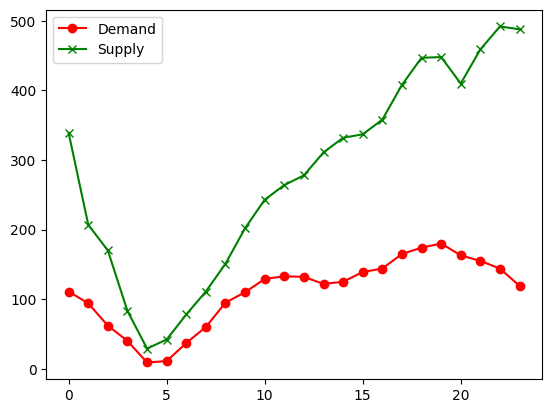

In [46]:
plt.plot('Time (Local)', 'Total_drivers', data=minimum, color ='red', label ='Demand', marker = 'o')
plt.plot('Time (Local)', 'Total_eyeballs', data=minimum, color ='green', label ="Supply", marker ='x')
plt.legend()
plt.show()

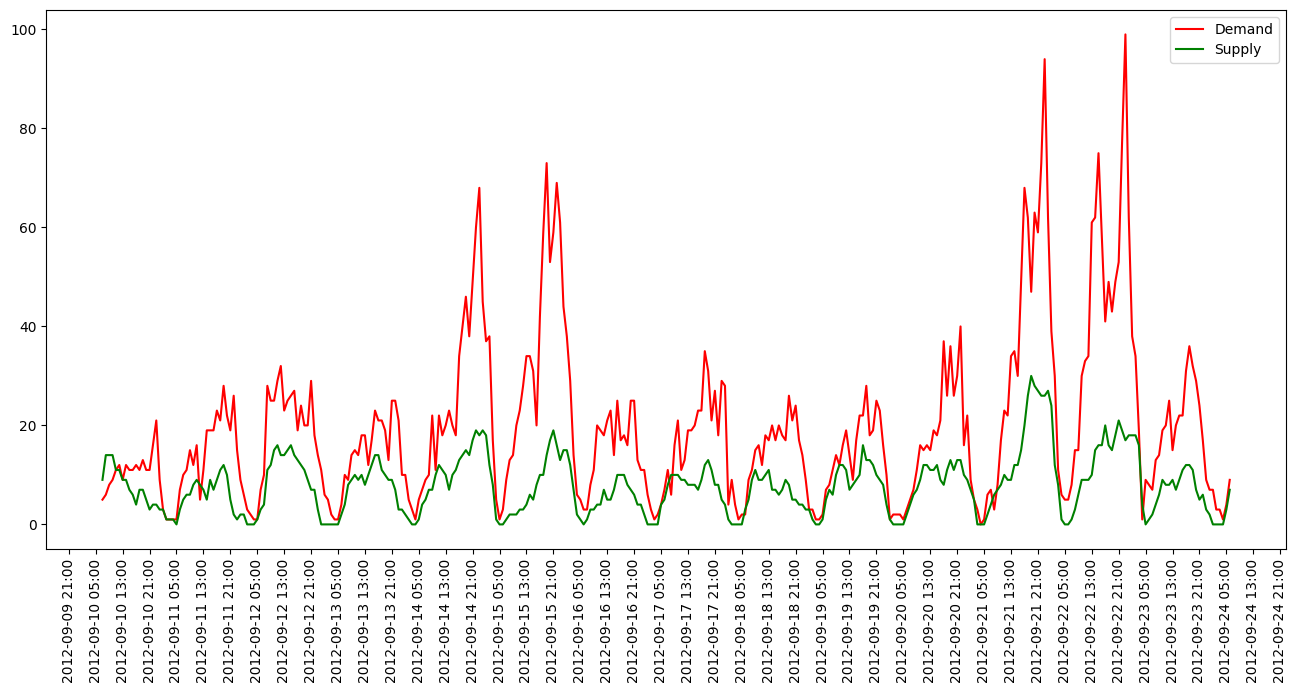

In [47]:
plt.figure(figsize=(16,7))
plt.plot(df['datetime'], df['Eyeballs '], color ='red', label ='Demand')
plt.plot(df['datetime'], df['Unique Drivers'], color ='green', label ="Supply")
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval =8))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=90)
plt.legend()
plt.show()